# Homework 4 - Concept Drift

Load the SEA dataset ("sea.csv"). It has three features and one target column.

## Tasks
1. Train a [SVM classifier](https://scikit-learn.org/stable/modules/svm.html) (gamma = 0.01) with the first 10000 samples of the stream. Subsequently, evaluate it on the remaining data instances. What [score](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score) do you achieve on the train and the test set? <br /> <br />
2. Implement a Page Hinkley change detection on the datastream. Again use the first 10000 data instances for the first model training. Retrain the model when a change is detected. How many drifts do you detect in the data? Plot the score curve and also the drift detection points. Use lambda = 0.01 and batch size = 1000 for each data sample (`stream.next_sample()`) <br /> <br />
3. Perform a grid search on the whole dataset with the following paramters:  <br /> <br />  **Page-Hinkley:** lambda = [0.01, 0.05, 0.1, 1]  <br /> **SVM:** svm_gamma = [0.01, 0.1]  <br /> <br /> Use the first 10000 samples for the initial training and then a batch-size of 1000 samples for iterative evaluation. Print the prediction accuracy for each parameter pair. What is the best parameter pair? *Hint: You have to implement GridSearch manually.*

## Solution 1

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from skmultiflow.data.data_stream import DataStream

data = pd.read_csv("./data/sea.csv")
stream = DataStream(data = data)
stream.prepare_for_use()

clf = SVC(gamma=0.01)

"""
Placehorder for comments:

"""
def seaSVM():
   
    #Code your solution here
    X_train, y_train = stream.next_sample(10000)
    X_test, y_test = stream.next_sample(90000)
    
    clf.fit(X_train, y_train)
    
    stream.restart()
    #Return your scores here
    return {"train-score":clf.score(X_train, y_train), "test-score":clf.score(X_test, y_test)}
seaSVM()

C:\Users\Markus\anaconda3\envs\aiss\lib\site-packages\skmultiflow\data\base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(


{'train-score': 0.8782, 'test-score': 0.8331}

## Solution 2
You **do not** have to put your code in this function. Just make sure that the image of your plot is saved by the provided command and you return the amount of drift points.

The plot should contain: 
- Page Hinkley Scores
- A visual represenation of the breakpoints

You can save the plot by using `plt.savefig("plot.png")`.


In [29]:
"""
Placehorder for comments:

"""

def phBreakPoints():
    # Replace 0 by the number of detected drifts 
    
    return 13
    

## Solution 3

In [35]:
"""
Its sufficient if you only return the best parameters and leave your solution in the playground area.
Placehorder for comments:

"""

def bestSMVParams():
    # Replace the 0's, leave your code in the playground area
    return {'lambda': 0.05, 'gamma': 0.1}
    

<hr>

# Playground


In [31]:
stream = DataStream(data = data)
stream.prepare_for_use()

def compute_ph_statistics(score, mean_score_list, ph_sum_list):

    mean_t_1 = mean_score_list[-1]
    sum_t_1 = ph_sum_list[-1]
    sample_count = len(mean_score_list)


    mean_t = mean_t_1 + (score - mean_t_1) / float(sample_count)
    sum_t = sum_t_1 + (score - mean_t)
    
    mean_score_list.append(mean_t)
    ph_sum_list.append(sum_t)

    s_max = max(ph_sum_list) - sum_t
    s_min = sum_t - min(ph_sum_list)

    
    return (mean_score_list, ph_sum_list, s_max, s_min)

C:\Users\Markus\anaconda3\envs\aiss\lib\site-packages\skmultiflow\data\base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(


In [32]:
def do_ph(ph_lambda = 0.01, gamma=0.01):
    
    stream.restart()

    X_train, y_train = stream.next_sample(10000)
    clf.set_params(gamma=gamma)
    clf.fit(X_train, y_train)

    # Set initial values
    ph_sum = [0]
    ph_mean = [0]
    score_list = []
    drift_detected = []

    for i in range(int(stream.n_remaining_samples()/1000)):
        
        X_test, _ = stream.next_sample(1000)
        y_predict = clf.predict(X_test)

        #Receive true labels after a while
        y_test = stream.current_sample_y
        score = accuracy_score(y_test, y_predict)
        score_list.append(score)
            
        # get every single sample and calculate statistic
        ph_mean, ph_sum, s_min, s_max = compute_ph_statistics(score,ph_mean,ph_sum)

        if s_min > ph_lambda or s_max > ph_lambda:
            drift_detected.append(i)
            ph_sum = [0]
            ph_mean = [0]
            clf.fit(X_test, y_test)

    return score_list, drift_detected


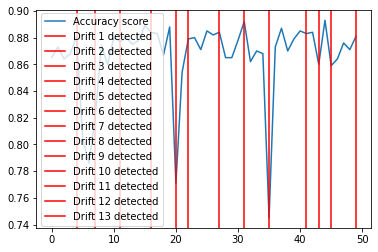

Accuracy: 0.8662400000000001


<Figure size 432x288 with 0 Axes>

In [33]:
score_list, drift_detected = do_ph(ph_lambda=0.01, gamma=0.01)

# Plots the score list
plt.figure()
plt.plot(score_list, label = 'Accuracy score')

j = 1
for i in drift_detected:
    plt.axvline(i, color = 'red', label = 'Drift {} detected'.format(j))
    j += 1
    
plt.legend()
plt.show()
plt.savefig("plot.png")
print('Accuracy:', np.mean(score_list))

In [34]:

# given
lambdas = [0.01, 0.05, 0.1, 1]
gammas = [0.01, 0.1]

# track all results and best results
results = []
max_combo = ((0,0),-1)

# perform grid search
for _lambda in lambdas:
    for _gamma in gammas:
        
        score_list, _ = do_ph(ph_lambda=_lambda,gamma=_gamma)
        
        mean_acc = np.mean(score_list)
        results.append(({'lambda':_lambda,'gamma':_gamma},mean_acc))
        
        if mean_acc > max_combo[1]:
            max_combo = ({'lambda':_lambda,'gamma':_gamma},mean_acc)

print(results)

print("best combo:")
print(max_combo)

[({'lambda': 0.01, 'gamma': 0.01}, 0.8662400000000001), ({'lambda': 0.01, 'gamma': 0.1}, 0.8713200000000001), ({'lambda': 0.05, 'gamma': 0.01}, 0.8660399999999998), ({'lambda': 0.05, 'gamma': 0.1}, 0.8737600000000001), ({'lambda': 0.1, 'gamma': 0.01}, 0.86854), ({'lambda': 0.1, 'gamma': 0.1}, 0.8714000000000002), ({'lambda': 1, 'gamma': 0.01}, 0.8331000000000001), ({'lambda': 1, 'gamma': 0.1}, 0.8392999999999999)]
best combo:
({'lambda': 0.05, 'gamma': 0.1}, 0.8737600000000001)
